In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
movies_df = pd.read_excel("/home/seetvn/random_projects/ekimetrics/data/formatted/movies_formatted.xlsx")
print(movies_df[movies_df['Genre']=='Documentary'])

               Title  Year Rated  imdbVotes  imdbRating  Runtime        Genre  \
132  What the Health  2017   NaN      30760         7.2       97  Documentary   

     BoxOffice  
132        NaN  


# Correlation between Film Length and Box Office Revenue

In [83]:
correlation = movies_df["Runtime"].corr(movies_df["BoxOffice"])
print(f"Correlation: {correlation}")

Correlation: 0.04932669811381531


# Correlation between IMDB Ratings and Box Office Revenue


In [107]:
correlation = movies_df["imdbRating"].corr(movies_df["BoxOffice"])
print(f"Correlation: {correlation}")

Correlation: 0.2722068285107077


# Correlation between Genre and Box Office Revenue

In [ ]:
genre_one_hot_encoding_df = pd.read_excel("/home/seetvn/random_projects/ekimetrics/data/formatted/movies_genre_one_hot_encodings.xlsx")
#TODO: will have to readjust indices
column_sums = genre_one_hot_encoding_df.iloc[:, 1:-2].sum().to_dict()
print(column_sums)

{'Action': 30, 'Adventure': 29, 'Animation': 11, 'Biography': 10, 'Comedy': 49, 'Crime': 23, 'Documentary': 1, 'Drama': 75, 'Family': 6, 'Fantasy': 13, 'History': 4, 'Horror': 22, 'Music': 3, 'Mystery': 19, 'Romance': 18, 'Sci-Fi': 11, 'Sport': 2, 'Thriller': 27, 'War': 3}


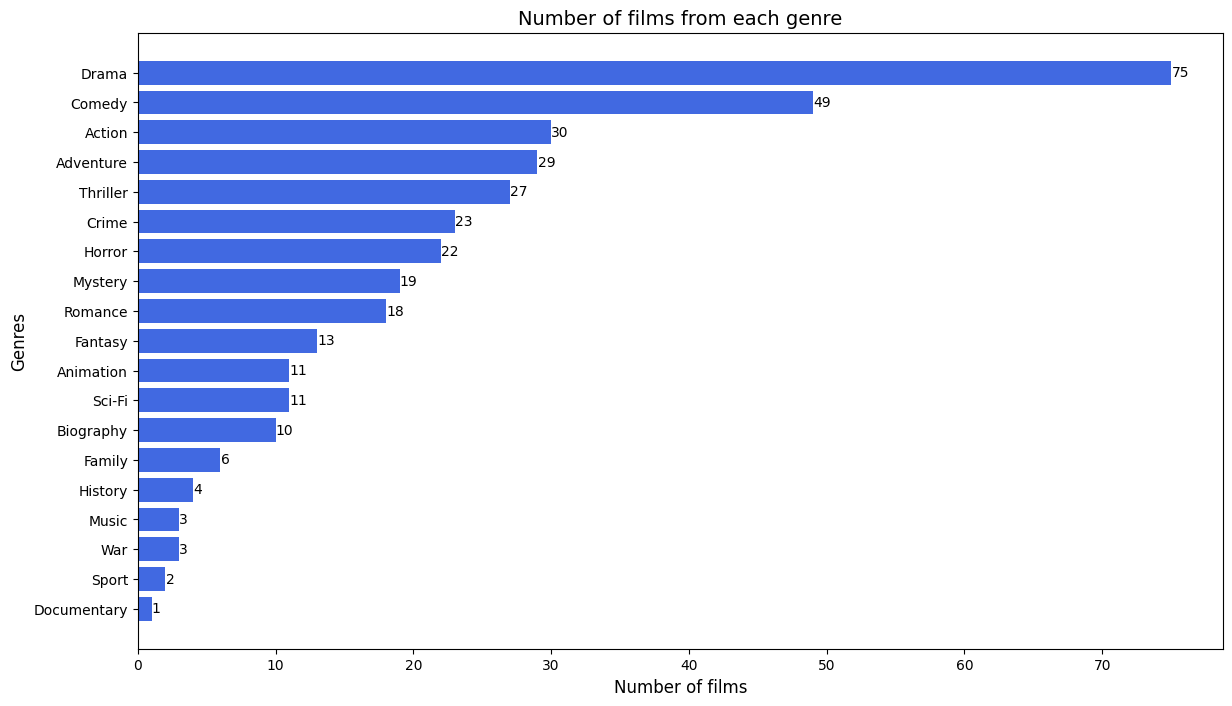

In [109]:
# Sort correlations
sorted_genre_frequency = sorted(column_sums.items(), key=lambda x: x[1],reverse=True)
x_plot = [genre_frequency[0] for genre_frequency in sorted_genre_frequency]
y_plot = [genre_frequency[1] for genre_frequency in sorted_genre_frequency]
plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot, color="royalblue")
for i, v in enumerate(y_plot):
    plt.text(v + 0.02, i, f"{v}", va="center", fontsize=10, color="black")


plt.xlabel("Number of films", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.title("Number of films from each genre", fontsize=14)
plt.gca().invert_yaxis() 

plt.show()

In [103]:
# Identify genre columns (excluding 'Title', 'imdbRating')
genre_columns = genre_one_hot_encoding_df.columns[1:-2] 
correlations = genre_one_hot_encoding_df[genre_columns].corrwith(genre_one_hot_encoding_df["BoxOffice"])
correlations = correlations.sort_values(ascending=False)
print(correlations)

Adventure      0.420132
Animation      0.363586
Action         0.221129
Comedy         0.179075
Fantasy        0.028223
Family        -0.005174
History       -0.028935
Sci-Fi        -0.031999
Sport         -0.050537
Music         -0.055935
Biography     -0.061857
War           -0.075020
Crime         -0.076966
Horror        -0.094775
Mystery       -0.103888
Romance       -0.128608
Thriller      -0.138493
Drama         -0.244885
Documentary         NaN
dtype: float64


/home/seetvn/random_projects/ekimetrics/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/seetvn/random_projects/ekimetrics/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Plotted correlation coefficient of each genre

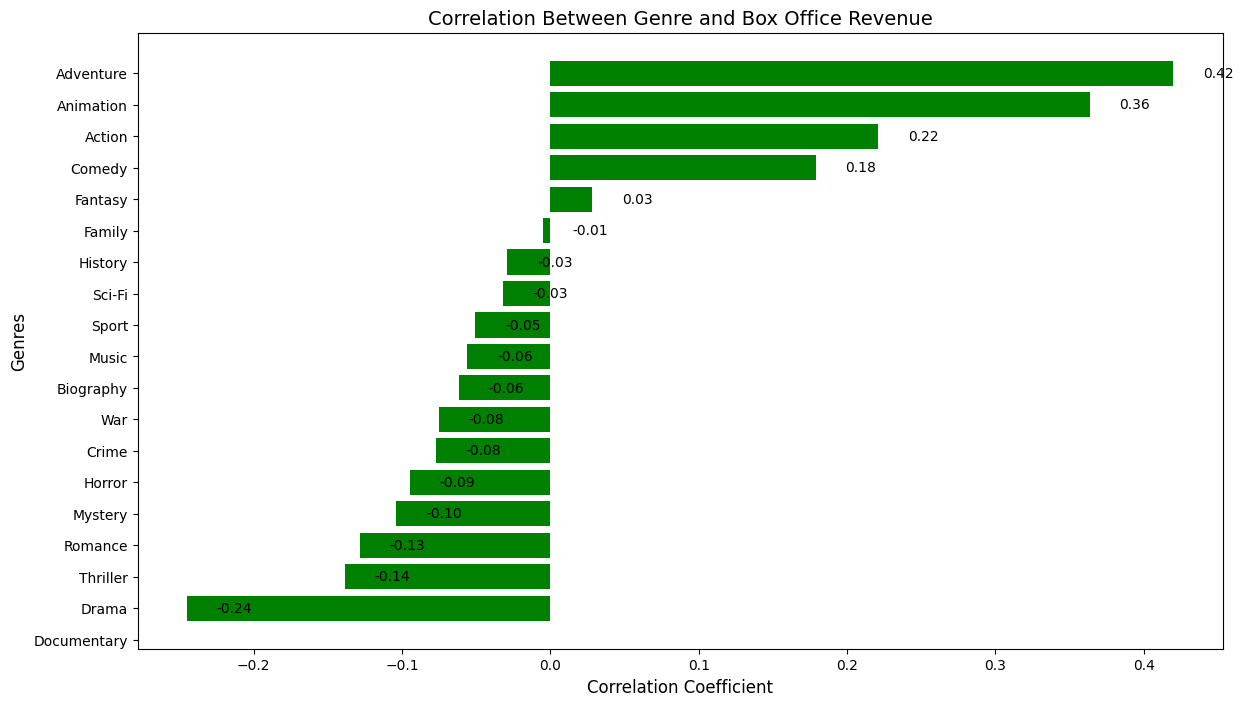

In [104]:

# Sort correlations
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1],reverse=True)
x_plot = [correlation[0] for correlation in sorted_correlations]
y_plot = [correlation[1] for correlation in sorted_correlations]
plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot, color="green")
for i, v in enumerate(y_plot):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center", fontsize=10, color="black")


plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.title("Correlation Between Genre and Box Office Revenue", fontsize=14)
plt.gca().invert_yaxis()  # Highest correlation at the top

plt.show()

# Average box office for each genre

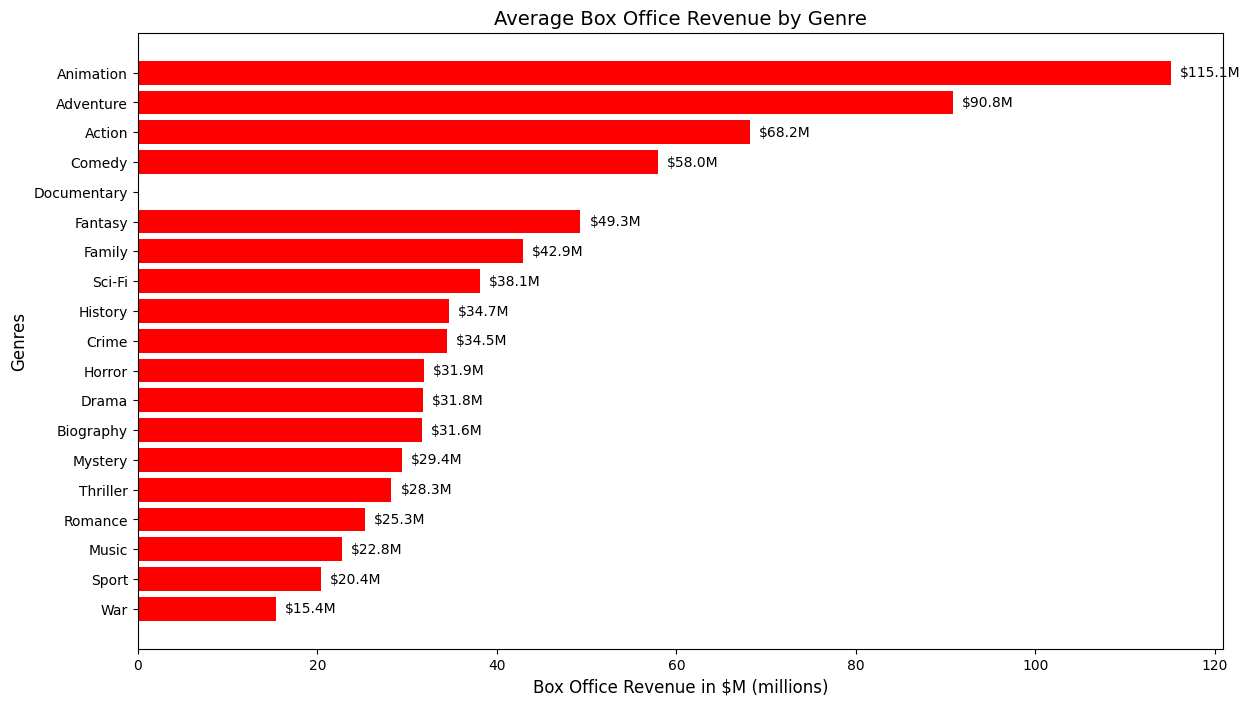

In [105]:
# Compute average BoxOffice for each genre
average_boxoffice_per_genre = {
    genre: float(genre_one_hot_encoding_df.loc[genre_one_hot_encoding_df[genre] == 1, "BoxOffice"].mean())
    for genre in genre_columns
}

sorted_boxoffice = dict(sorted(average_boxoffice_per_genre.items(), key=lambda x: x[1],reverse=True))
# Extract sorted keys and values
x_plot = list(sorted_boxoffice.keys())
y_plot = list(sorted_boxoffice.values())

y_plot_millions = [value / 1e6 for value in y_plot]

plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot_millions, color="red")

for i, v in enumerate(y_plot_millions):
    plt.text(v + 1, i, f"${v:,.1f}M", va="center", fontsize=10, color="black")

plt.xlabel("Box Office Revenue in $M (millions)", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.title("Average Box Office Revenue by Genre", fontsize=14)
plt.gca().invert_yaxis() 